In [1]:
import pandas as pd
import yfinance as yf


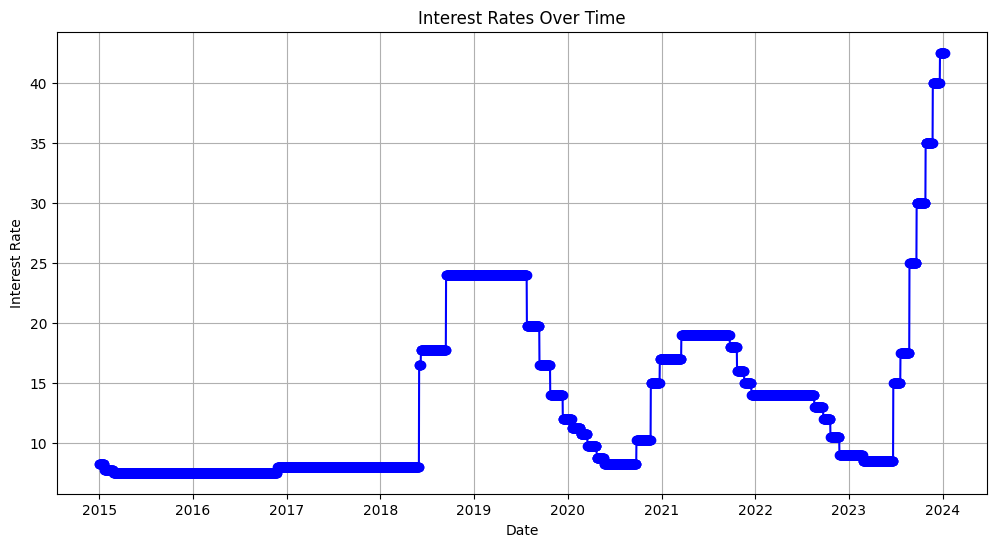

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pymongo import MongoClient

# Constants
MONGO_URI = "mongodb://127.0.0.1:27017/"
DB_NAME = "stockdata"
COLLECTION_NAME = "interest"

# Connect to MongoDB
client = MongoClient(MONGO_URI)
db = client[DB_NAME]
collection = db[COLLECTION_NAME]

# Retrieve data from MongoDB
data = list(collection.find({}, {'_id': 1, 'Rate': 1}))

# Convert data to DataFrame
df = pd.DataFrame(data)
df['_id'] = pd.to_datetime(df['_id'], format='%Y-%m-%d')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['_id'], df['Rate'], marker='o', linestyle='-', color='b')
plt.title('Interest Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Interest Rate')
plt.grid(True)
plt.show()

# Close the MongoDB connection
client.close()


In [3]:
from pymongo import MongoClient
from datetime import datetime

# MongoDB connection
client = MongoClient("mongodb://localhost:27017/")
db = client["stockdata"]  # Replace with your actual database name

# Replace this value with your actual collection name
collection_name = "interest_try"

# Access the collection
collection = db[collection_name]

# Retrieve the most recent entry
most_recent_entry = collection.find_one(sort=[('_id', -1)])

#Type str
most_recent_date = most_recent_entry.get("_id")



client.close()


In [7]:
from pymongo import MongoClient

# MongoDB connection
client = MongoClient("mongodb://localhost:27017/")
db = client["stockdata"]  # Replace with your actual database name

# Replace this value with your actual collection name
collection_name = "interest_try"

# Access the collection
collection = db[collection_name]

# Retrieve the most recent 5 entries
recent_entries = collection.find().sort([('_id', -1)]).limit(5)

# Print the most recent 5 entries
for entry in recent_entries:
    print(entry)

# Close the MongoDB connection
client.close()


{'_id': '2024-01-10', 'Rate': 42.5}
{'_id': '2024-01-09', 'Rate': 42.5}
{'_id': '2024-01-08', 'Rate': 42.5}
{'_id': '2024-01-07', 'Rate': 42.5}
{'_id': '2024-01-06', 'Rate': 42.5}


In [4]:
import os
os .chdir("../")

In [5]:
from src.update_db import update_interest_collection

In [6]:
update_interest_collection()

/Users/muratisiklan/Desktop/stock-price/src/update_db.py:82: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_excel(EXCEL_FILE_PATH, parse_dates=['Date'])
